In [100]:
#import Libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [101]:
# Load dataset from Excel file
df = pd.read_excel('KDD_DDoS.xlsx')

In [102]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('xAttack', axis=1), df['xAttack'], 
                                                    test_size=0.5, random_state=195)

# Create classifiers object models and train
knn_model = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
        
svm_model = SVC().fit(X_train, y_train.values.ravel())

dt_model = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())

lr_model = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000).fit(X_train, 
                                                                                           y_train.values.ravel())

nb_model = GaussianNB().fit(X_train, y_train.values.ravel())

#list to hold models to use later on
classifiers = ['KNN', 'SVM', 'DT', 'LR', 'NB']

#colors to plot graph with 
colors = ['Red', 'Purple', 'Cyan', 'Black', 'Yellow']

In [103]:
#Run Predictions 
y_pred_knn=knn_model.predict(X_test)
y_pred_svm=svm_model.predict(X_test)
y_pred_dt=dt_model.predict(X_test)
y_pred_lr=lr_model.predict(X_test)
y_pred_nb=nb_model.predict(X_test)

In [104]:
#calculate confusion matrics 
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)

Accuracy :
KNN: 0.9855360570331779
SVM: 0.5739649026597203
DT: 0.995544282972306
LR: 0.846037839319989
NB: 0.640869207567864


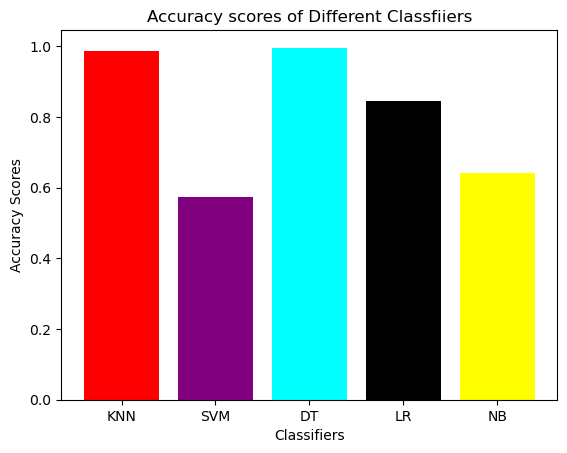

In [105]:
#Calculate performace metrics for each model

#Accuracy 
accuracy_list=[]
knn_accuracy = (cm_knn[1, 1]+cm_knn[0, 0]) / (cm_knn[1, 1]+cm_knn[0, 0]+ cm_knn[0, 1]+cm_knn[1, 0])
svm_accuracy = (cm_svm[1, 1]+cm_svm[0, 0]) / (cm_svm[1, 1]+cm_svm[0, 0]+ cm_svm[0, 1]+cm_svm[1, 0])
dt_accuracy = (cm_dt[1, 1]+cm_dt[0, 0]) / (cm_dt[1, 1]+cm_dt[0, 0]+ cm_dt[0, 1]+cm_dt[1, 0])
lr_accuracy = (cm_lr[1, 1]+cm_lr[0, 0]) / (cm_lr[1, 1]+cm_lr[0, 0]+ cm_lr[0, 1]+cm_lr[1, 0])
nb_accuracy = (cm_nb[1, 1]+cm_nb[0, 0]) / (cm_nb[1, 1]+cm_nb[0, 0]+ cm_nb[0, 1]+cm_nb[1, 0])

#add all the accuracy scores to a list
accuracy_list.extend([knn_accuracy, svm_accuracy, dt_accuracy, lr_accuracy, nb_accuracy])

#print accuracy values 
print("Accuracy :")
for model, accuracy in zip(classifiers, accuracy_list):
    print(f'{model}: {accuracy}')
    
#Plot accuracy bar chart
#Labels
plt.title('Accuracy scores of Different Classfiiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Scores')
plt.bar(classifiers, accuracy_list,  color=colors)

plt.show()

Precision :
KNN: 0.9796096708418293
SVM: 0.8129032258064516
DT: 0.9963137717487467
LR: 0.8687408847836655
NB: 0.5702054794520548


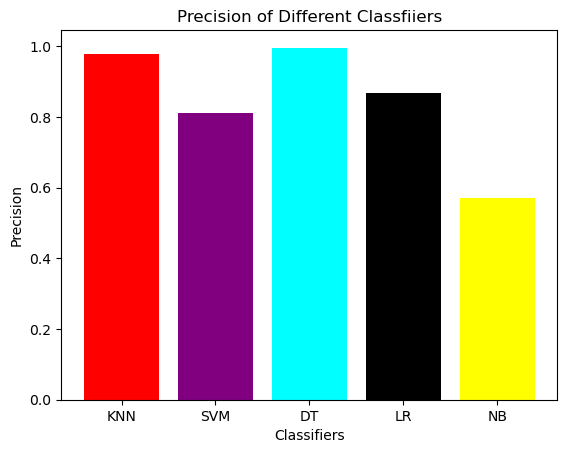

In [106]:
#Precision Scores
precision_list=[]
knn_precision = cm_knn[1, 1] / (cm_knn[1, 1]+cm_knn[0, 1])
svm_precision = cm_svm[1, 1] / (cm_svm[1, 1]+cm_svm[0, 1])
dt_precision = cm_dt[1, 1] / (cm_dt[1, 1]+cm_dt[0, 1])
lr_precision = cm_lr[1, 1] / (cm_lr[1, 1]+cm_lr[0, 1])
nb_precision = cm_nb[1, 1] / (cm_nb[1, 1]+cm_nb[0, 1])

#add all the precision scores to a list
precision_list.extend([knn_precision, svm_precision, dt_precision, lr_precision, nb_precision])

#print precision values 
print("Precision :")
for model, precision in zip(classifiers, precision_list):
    print(f'{model}: {precision}')
    
#Plot precision bar chart
#Labels
plt.title('Precision of Different Classfiiers')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.bar(classifiers, precision_list,  color=colors)

plt.show()

False Positive Rate :
KNN: 0.017969451931716084
SVM: 0.022333461686561418
DT: 0.0032088307020921576
LR: 0.1039661147477859
NB: 0.6121165447311


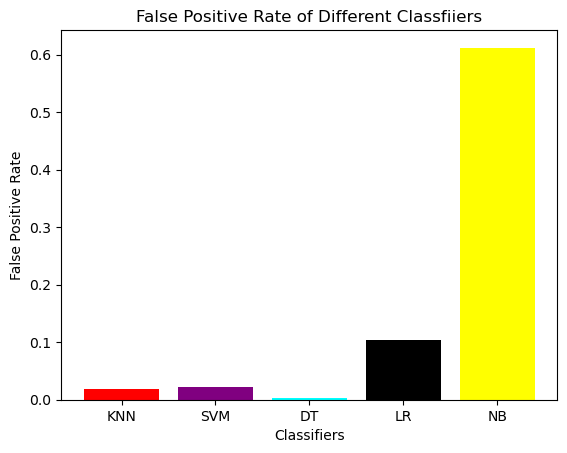

In [107]:
#False Positive Rate - FPR
fpr_list=[]
knn_fpr = cm_knn[0, 1] / (cm_knn[0, 0]+cm_knn[0, 1])
svm_fpr = cm_svm[0, 1] / (cm_svm[0, 0]+cm_svm[0, 1])
dt_fpr = cm_dt[0, 1] / (cm_dt[0, 0]+cm_dt[0, 1])
lr_fpr = cm_lr[0, 1] / (cm_lr[0, 0]+cm_lr[0, 1])
nb_fpr = cm_nb[0, 1] / (cm_nb[0, 0]+cm_nb[0, 1])

#add all the fpr scores to a list
fpr_list.extend([knn_fpr, svm_fpr, dt_fpr, lr_fpr, nb_fpr])

#print fpr values 
print("False Positive Rate :")
for model, false_positive_rate in zip(classifiers, fpr_list):
    print(f'{model}: {false_positive_rate}')
    
#Plot fpr bar chart
#Labels
plt.title('False Positive Rate of Different Classfiiers')
plt.xlabel('Classifiers')
plt.ylabel('False Positive Rate')
plt.bar(classifiers, fpr_list,  color=colors)

plt.show()

False Negative Rate :
KNN: 0.010445784905105194
SVM: 0.8887744593202883
DT: 0.005884949242312785
LR: 0.21126967779902897
NB: 0.06914815359717523


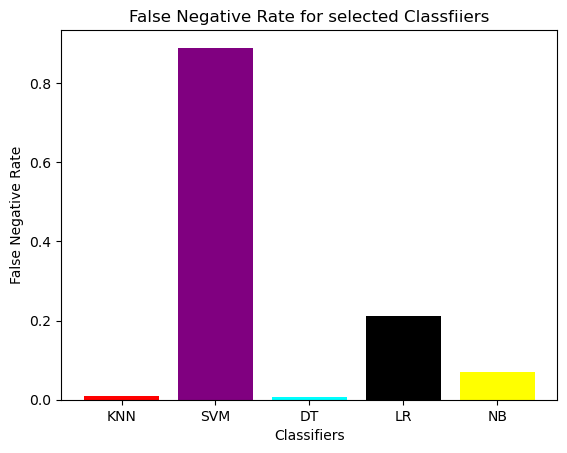

In [108]:
#False Negative Rate - FNR
fnr_list=[]
knn_fnr = cm_knn[1, 0] / (cm_knn[1, 1]+cm_knn[1, 0])
svm_fnr = cm_svm[1, 0] / (cm_svm[1, 1]+cm_svm[1, 0])
dt_fnr = cm_dt[1, 0] / (cm_dt[1, 1]+cm_dt[1, 0])
lr_fnr = cm_lr[1, 0] / (cm_lr[1, 1]+cm_lr[1, 0])
nb_fnr = cm_nb[1, 0] / (cm_nb[1, 1]+cm_nb[1, 0])

#add all the fnr scores to a list
fnr_list.extend([knn_fnr, svm_fnr, dt_fnr, lr_fnr, nb_fnr])

#print fnr values 
print("False Negative Rate :")
for model, false_negative_rate in zip(classifiers, fnr_list):
    print(f'{model}: {false_negative_rate}')
    
#Plot fnr bar chart
#Labels
plt.title('False Negative Rate for selected Classfiiers')
plt.xlabel('Classifiers')
plt.ylabel('False Negative Rate')
plt.bar(classifiers, fnr_list,  color=colors)

plt.show()

True Positive Rate :
KNN: 0.9895542150948948
SVM: 0.11122554067971163
DT: 0.9941150507576872
LR: 0.7887303222009711
NB: 0.9308518464028248


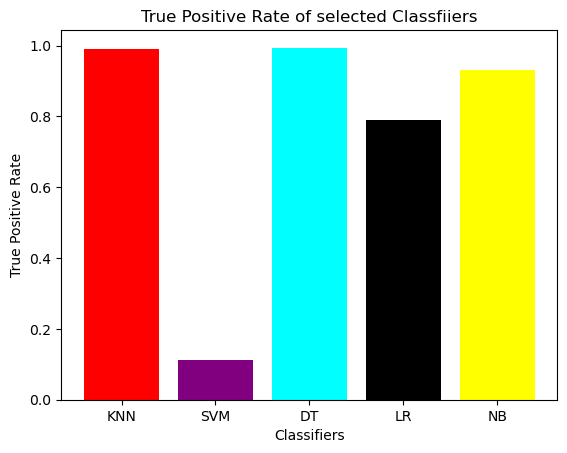

In [109]:
#True Positive Rate - TPR
tpr_list=[]
knn_tpr = cm_knn[1, 1] / (cm_knn[1, 1] + cm_knn[1, 0])
svm_tpr = cm_svm[1, 1] / (cm_svm[1, 1] + cm_svm[1, 0])
dt_tpr = cm_dt[1, 1] / (cm_dt[1, 1] + cm_dt[1, 0])
lr_tpr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[1, 0])
nb_tpr = cm_nb[1, 1] / (cm_nb[1, 1] + cm_nb[1, 0])

#add all the tpr scores to a list
tpr_list.extend([knn_tpr, svm_tpr, dt_tpr, lr_tpr, nb_tpr])

#print tpr values 
print("True Positive Rate :")
for model, true_positive_rate in zip(classifiers, tpr_list):
    print(f'{model}: {true_positive_rate}')
    
#Plot TPR bar chart
#Labels
plt.title('True Positive Rate of selected Classfiiers')
plt.xlabel('Classifiers')
plt.ylabel('True Positive Rate')
plt.bar(classifiers, tpr_list,  color=colors)

plt.show()

True Negative Rate :
KNN: 0.5321694372956806
SVM: 0.909709781440344
DT: 0.5347380017902638
LR: 0.5656295576081672
NB: 0.32324312760723073


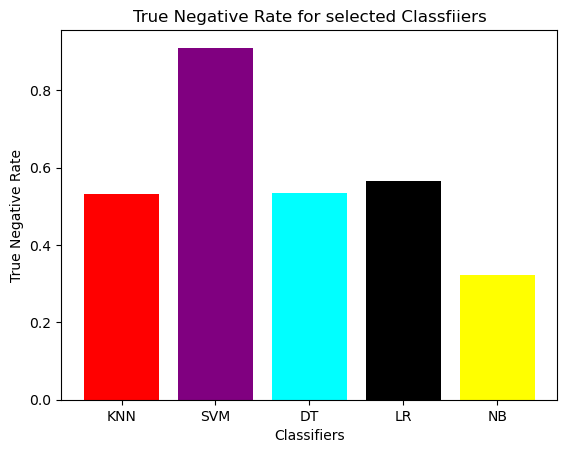

In [110]:
#True Negative rate - TNR
tnr_list=[]
knn_tnr = cm_knn[0, 0] / (cm_knn[0, 0] + cm_knn[1, 1])
svm_tnr = cm_svm[0, 0] / (cm_svm[0, 0] + cm_svm[1, 1])
dt_tnr = cm_dt[0, 0] / (cm_dt[0, 0] + cm_dt[1, 1])
lr_tnr = cm_lr[0, 0] / (cm_lr[0, 0] + cm_lr[1, 1])
nb_tnr = cm_nb[0, 0] / (cm_nb[0, 0] + cm_nb[1, 1])

#add all TNR scores to a list
tnr_list.extend([knn_tnr, svm_tnr, dt_tnr, lr_tnr, nb_tnr])

#print tnr values 
print("True Negative Rate :")
for model, true_negative_rate in zip(classifiers, tnr_list):
    print(f'{model}: {true_negative_rate}')
    
#Plot tnr bar chart
#Labels
plt.title('True Negative Rate for selected Classfiiers')
plt.xlabel('Classifiers')
plt.ylabel('True Negative Rate')
plt.bar(classifiers, tnr_list,  color=colors)

plt.show()